In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os

In [3]:
# Plotting the accuracy and loss
def plot_training_history(history):
    # Extract data
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [4]:
# Function to display predictions with confidence level
def predict_with_confidence(model, generator, class_indices):
    class_labels = {v: k for k, v in class_indices.items()}  # Reverse the mapping
    for images, labels in generator:
        predictions = model.predict(images)
        for i, prediction in enumerate(predictions):
            confidence = np.max(prediction)  # Highest confidence value
            predicted_class = np.argmax(prediction)  # Predicted class index
            actual_class = np.argmax(labels[i])  # Actual class index
            
            predicted_label = class_labels[predicted_class]
            actual_label = class_labels[actual_class]
            
            print(f"Image {i+1}:")
            print(f"  Predicted: {predicted_label} with confidence {confidence:.2f}")
            print(f"  Actual: {actual_label}\n")
            
            # Display the image (optional)
            plt.imshow(images[i])
            plt.axis('off')
            plt.title(f"Predicted: {predicted_label} ({confidence:.2f})\nActual: {actual_label}")
            plt.show()
        break  # Only show one batch

Found 7779 images belonging to 3 classes.
Found 2786 images belonging to 3 classes.
Found 1310 images belonging to 3 classes.
Class Indices Mapping: {'bao': 0, 'random': 1, 'uni_sushi': 2}


C:\Users\sunda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


C:\Users\sunda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


244/244 ━━━━━━━━━━━━━━━━━━━━ 132s 531ms/step - accuracy: 0.8142 - loss: 0.5938 - val_accuracy: 0.8959 - val_loss: 0.2434
Epoch 2/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 111s 452ms/step - accuracy: 0.8691 - loss: 0.3282 - val_accuracy: 0.9325 - val_loss: 0.2026
Epoch 3/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 110s 446ms/step - accuracy: 0.9021 - loss: 0.2594 - val_accuracy: 0.9307 - val_loss: 0.2026
Epoch 4/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 112s 456ms/step - accuracy: 0.9087 - loss: 0.2388 - val_accuracy: 0.9365 - val_loss: 0.1620
Epoch 5/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 112s 454ms/step - accuracy: 0.9098 - loss: 0.2198 - val_accuracy: 0.9214 - val_loss: 0.2108
Epoch 6/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 112s 454ms/step - accuracy: 0.9170 - loss: 0.2196 - val_accuracy: 0.9174 - val_loss: 0.2177
Epoch 7/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 112s 454ms/step - accuracy: 0.9244 - loss: 0.1921 - val_accuracy: 0.9566 - val_loss: 0.1327
Epoch 8/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 111s 453ms/step - accuracy: 0.9389 - los

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Image 1:
  Predicted: random with confidence 1.00
  Actual: random



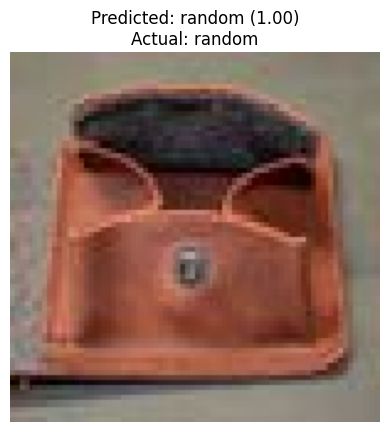

Image 2:
  Predicted: random with confidence 1.00
  Actual: random



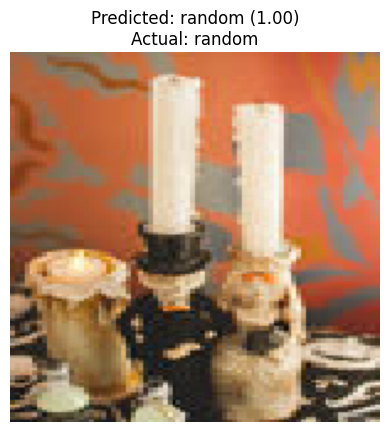

Image 3:
  Predicted: uni_sushi with confidence 1.00
  Actual: uni_sushi



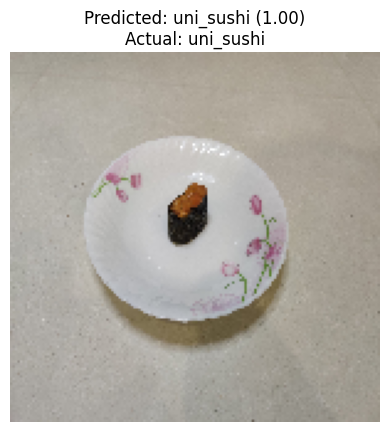

Image 4:
  Predicted: random with confidence 1.00
  Actual: random



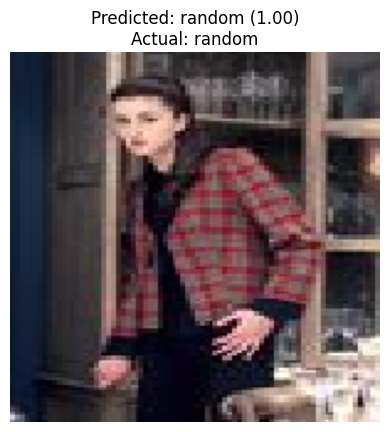

Image 5:
  Predicted: random with confidence 1.00
  Actual: random



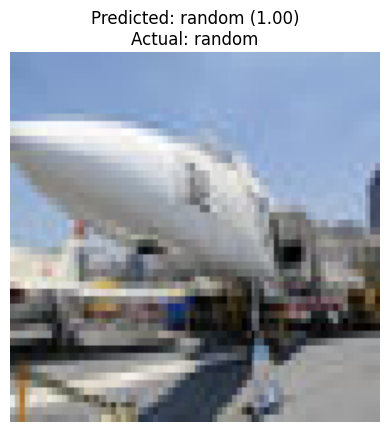

Image 6:
  Predicted: bao with confidence 1.00
  Actual: bao



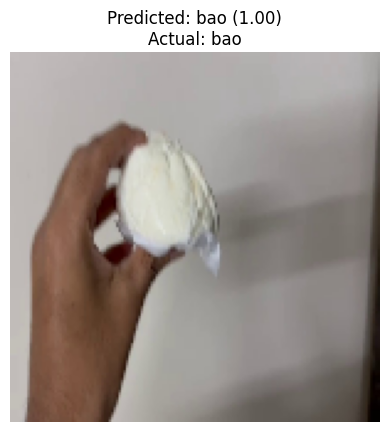

Image 7:
  Predicted: uni_sushi with confidence 1.00
  Actual: uni_sushi



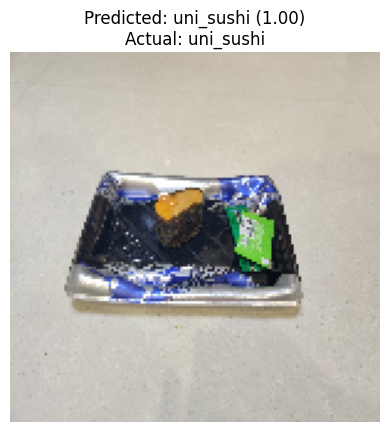

Image 8:
  Predicted: random with confidence 1.00
  Actual: random



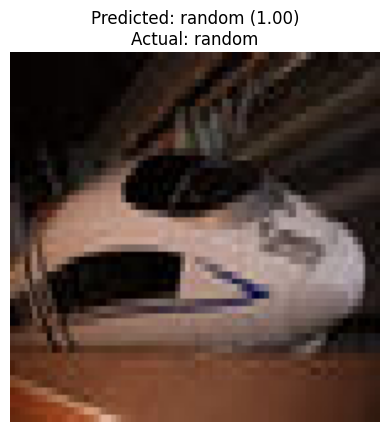

Image 9:
  Predicted: random with confidence 1.00
  Actual: random



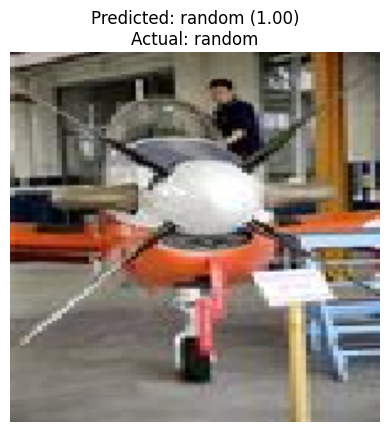

Image 10:
  Predicted: random with confidence 1.00
  Actual: random



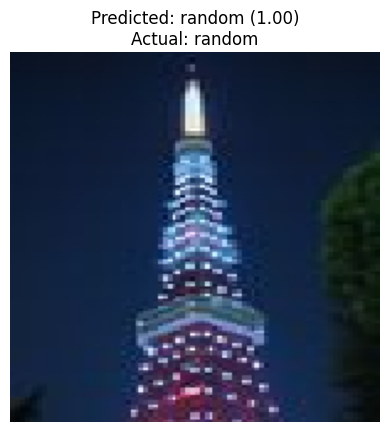

Image 11:
  Predicted: random with confidence 1.00
  Actual: random



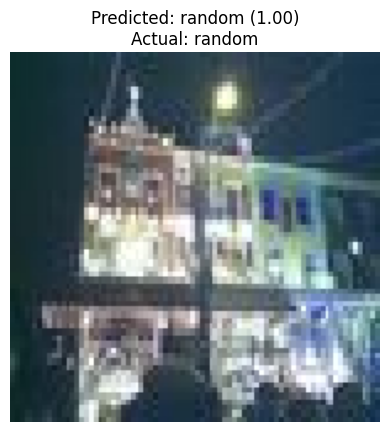

Image 12:
  Predicted: random with confidence 1.00
  Actual: random



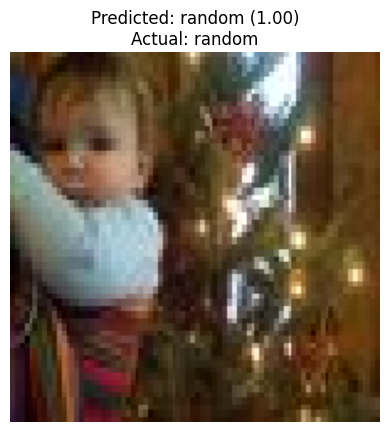

Image 13:
  Predicted: random with confidence 1.00
  Actual: random



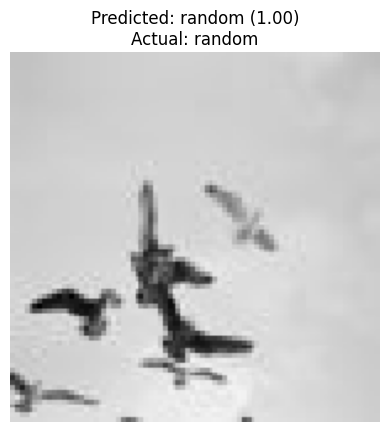

Image 14:
  Predicted: random with confidence 1.00
  Actual: random



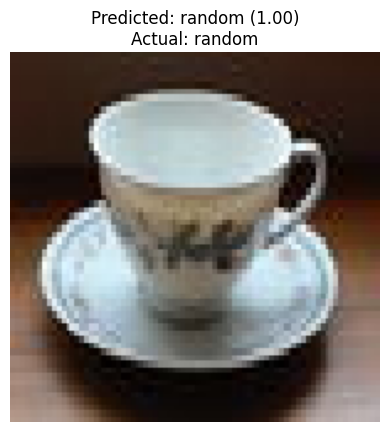

Image 15:
  Predicted: random with confidence 1.00
  Actual: random



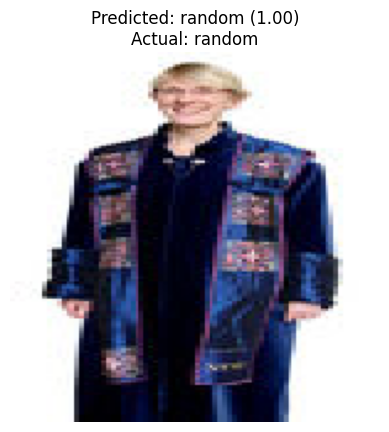

Image 16:
  Predicted: random with confidence 1.00
  Actual: random



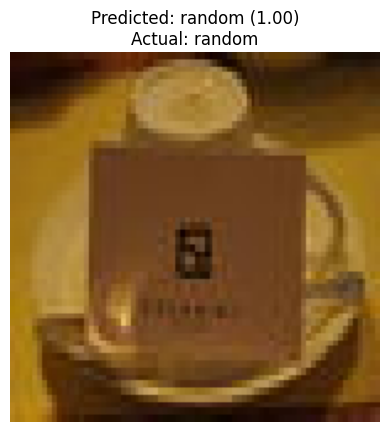

Image 17:
  Predicted: uni_sushi with confidence 1.00
  Actual: uni_sushi



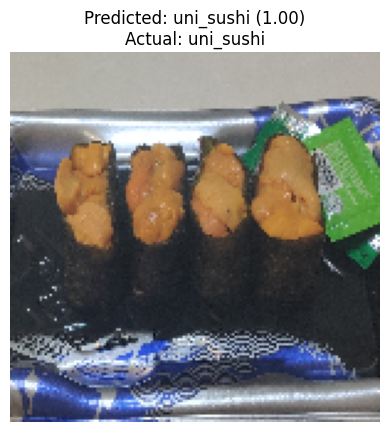

Image 18:
  Predicted: random with confidence 1.00
  Actual: random



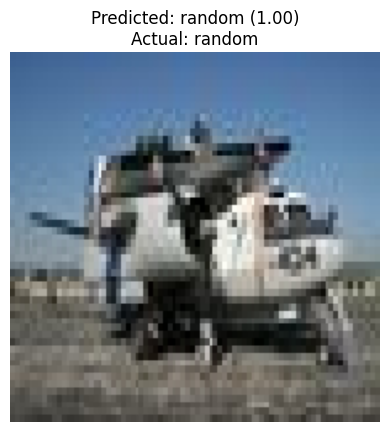

Image 19:
  Predicted: random with confidence 1.00
  Actual: random



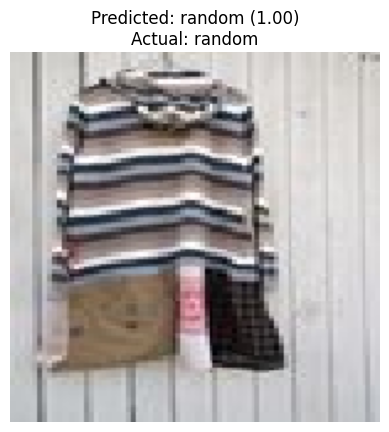

Image 20:
  Predicted: random with confidence 1.00
  Actual: random



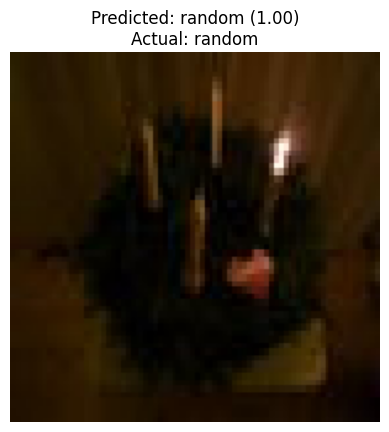

Image 21:
  Predicted: bao with confidence 1.00
  Actual: bao



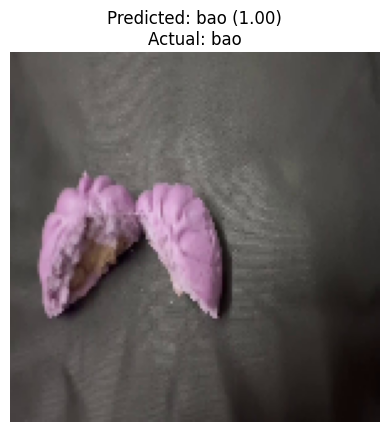

Image 22:
  Predicted: random with confidence 1.00
  Actual: random



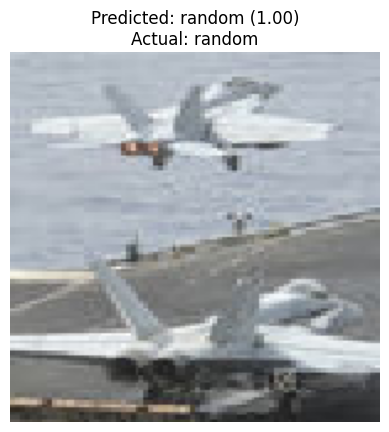

Image 23:
  Predicted: random with confidence 1.00
  Actual: random



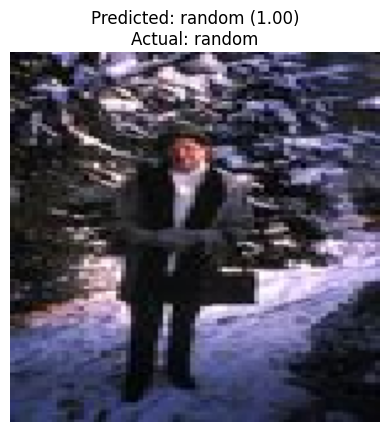

Image 24:
  Predicted: random with confidence 1.00
  Actual: random



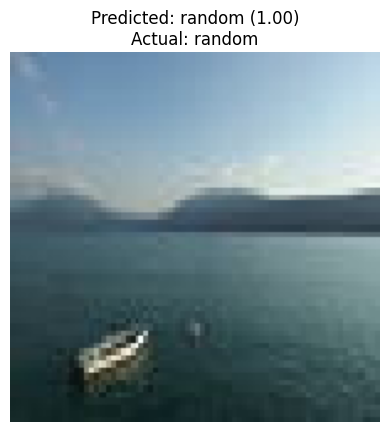

Image 25:
  Predicted: random with confidence 1.00
  Actual: random



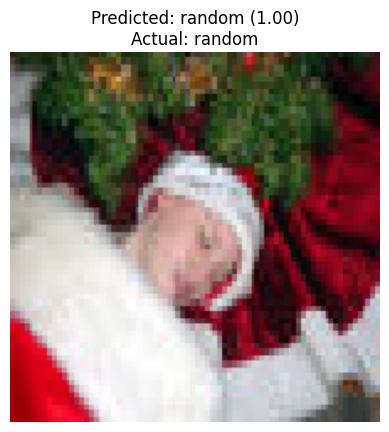

Image 26:
  Predicted: random with confidence 1.00
  Actual: random



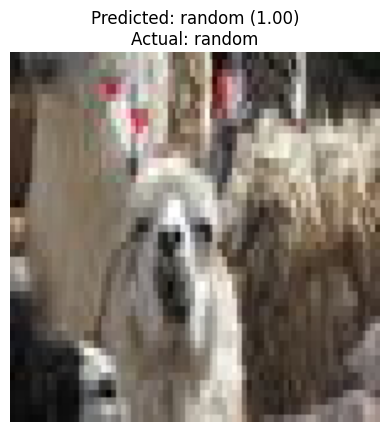

Image 27:
  Predicted: random with confidence 1.00
  Actual: random



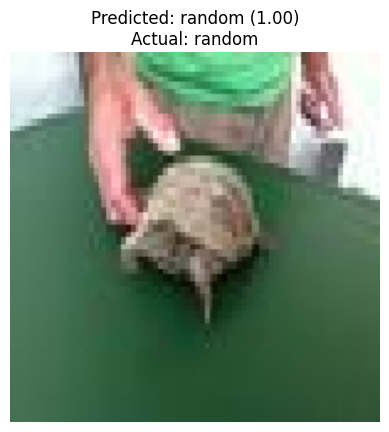

Image 28:
  Predicted: random with confidence 1.00
  Actual: random



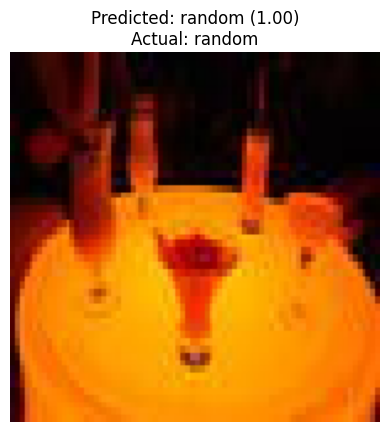

Image 29:
  Predicted: random with confidence 1.00
  Actual: random



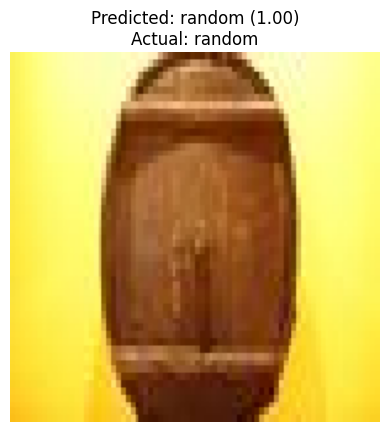

Image 30:
  Predicted: random with confidence 1.00
  Actual: random



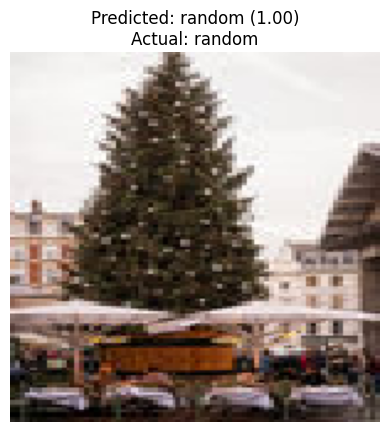

Image 31:
  Predicted: bao with confidence 1.00
  Actual: bao



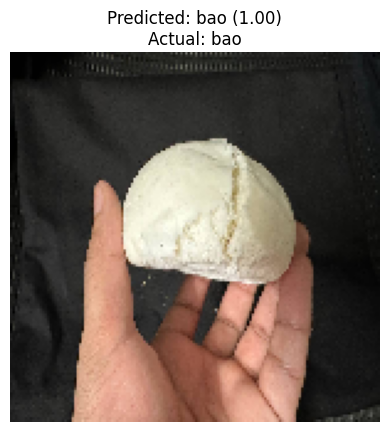

Image 32:
  Predicted: random with confidence 1.00
  Actual: random



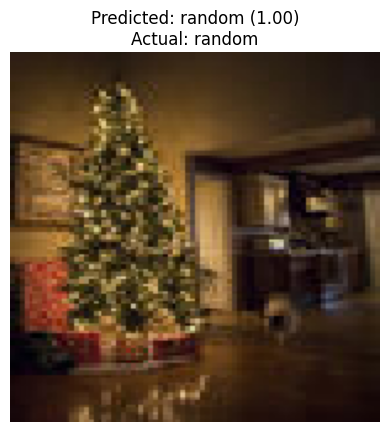

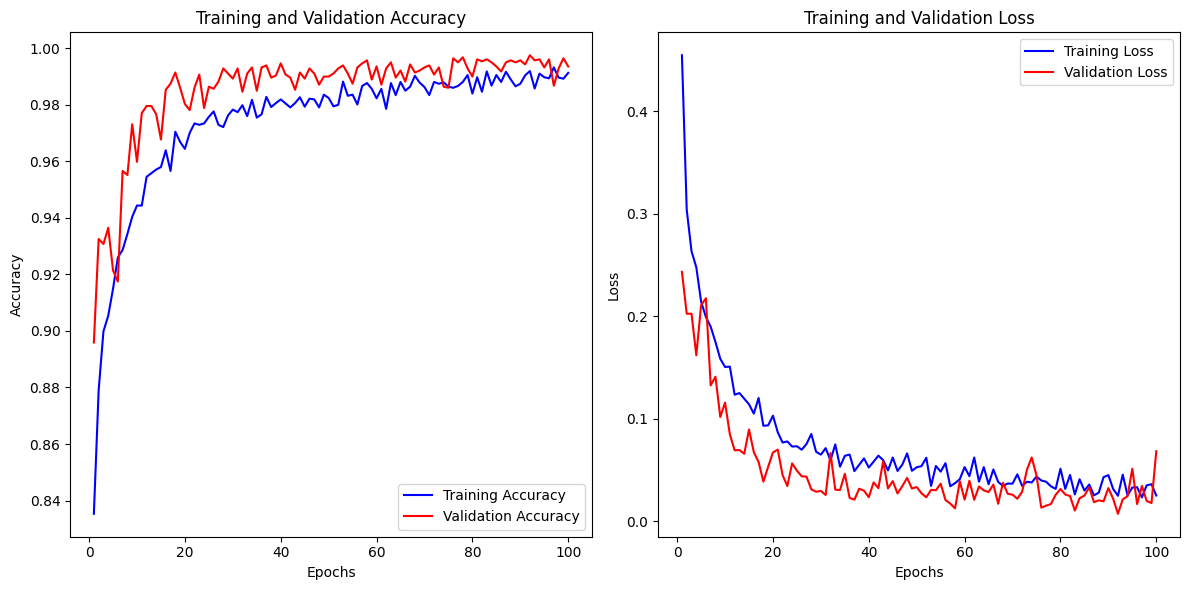

In [13]:
base_dir = "C:/Users/sunda/OneDrive/Documents/ML_AI_LABS/MLAI_Project/Dataset"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Image size and batch size
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Data preparation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = valid_test_datagen.flow_from_directory(
    validation_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = valid_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Capture class mappings
class_indices = train_generator.class_indices

print("Class Indices Mapping:", class_indices)

# CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # 3 classes: Bao, Uni Sushi, Random
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator
)

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')
predict_with_confidence(model, test_generator, class_indices)
plot_training_history(history)

In [16]:
model.save('C:/Users/sunda/OneDrive/Documents/ML_AI_LABS/MLAI_Project/Models/model02_theyan.h5')

In [10]:
import json
import numpy as np
from tensorflow.keras.preprocessing import image

In [44]:
# Load model and class mappings
model_ = tf.keras.models.load_model('C:/Users/sunda/OneDrive/Documents/ML_AI_LABS/MLAI_Project/Models/model02_theyan.h5')

model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'] 
)

with open("C:/Users/sunda/OneDrive/Documents/ML&AI LABS/class_mappings.json", "r") as f:
    index_to_class = json.load(f)

img_path = 
img = image.load_img(img_path, target_size=(150, 150))
img_array = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)

predicted_label = np.argmax(model_.predict(img_array))
predicted_class = index_to_class[str(predicted_label)]

print(f"Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Class: random


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import json

# Load model and class mappings
model_ = tf.keras.models.load_model('C:/Users/sunda/OneDrive/Documents/ML_AI_LABS/MLAI_Project/Models/model01_theyan.h5')

# Compile the loaded model (optional, if it was not already compiled when saved)
model_.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Load class mappings
with open("C:/Users/sunda/OneDrive/Documents/ML_AI_LABS/class_mappings.json", "r") as f:
    index_to_class = json.load(f)

# Define image path
img_path = "C:/Users/sunda/OneDrive/Documents/ML_AI_LABS/Project/bao_dataset/30.jpg" # Update with the actual image path

# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))  # Ensure image size matches model input
img_array = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)  # Normalize and add batch dimension

# Make prediction
predictions = model_.predict(img_array)
predicted_label = np.argmax(predictions)
predicted_class = index_to_class[str(predicted_label)]
confidence = np.max(predictions)  # Confidence level for the predicted class

# Display results
print(f"Predicted Class: {predicted_class}")
print(f"Confidence Level: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted Class: random
Confidence Level: 1.00
